In [61]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [62]:
model_uri = '../modelh5/model_rnn_nontuning.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 101, 64)           4224      
                                                                 
 flatten_4 (Flatten)         (None, 6464)              0         
                                                                 
 dense_16 (Dense)            (None, 64)                413760    
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_4 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_18 (Dense)            (None, 5)                 165       
                                                      

In [63]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()
file = open('testing.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)



In [64]:
dataset_path = '../data/testing_10/'

In [65]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                to_append = f'{file_path}'
                # print(file_path)
                y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
                coeffs = wavedec(y, 'db1', level=10)
                cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
                mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
                rms = librosa.feature.rms(y=cD1)[0]
                cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
                combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
                to_append = f'{file_path}'
                for e in combined_features:
                    to_append += f' {np.mean(e.T, axis=0)}'
                to_append += f' {semantic_label}'
                file = open('testing.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())





Processing: MVP


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=441
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=444
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=504
  warnings.warn(



Processing: MS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=505
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=367
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=330
  warnings.warn(



Processing: N

Processing: MR


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=488
  warnings.warn(



Processing: AS


In [66]:
data = pd.read_csv('./testing.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/testing_10/MVP/New_MVP_135.wav,-409.528564,87.384094,26.037184,-19.667170,-30.942360,-22.674948,-22.804028,-23.051409,-34.245644,...,0.002009,0.001601,0.001465,0.001038,0.000982,0.000833,0.000616,0.000510,0.000491,MVP
1,../data/testing_10/MVP/New_MVP_192.wav,-337.002411,89.271080,14.186399,1.686405,-6.657608,-13.926779,-20.226974,-19.441204,-17.915880,...,0.002848,0.002626,0.003480,0.003186,0.003180,0.002202,0.001917,0.002559,0.002665,MVP
2,../data/testing_10/MVP/New_MVP_179.wav,-407.230621,70.930885,-13.684482,-34.369339,-21.889259,-15.245199,-11.328670,-9.168187,-16.146969,...,0.004742,0.004964,0.003947,0.003980,0.003126,0.003334,0.002728,0.002642,0.002220,MVP
3,../data/testing_10/MVP/New_MVP_165.wav,-406.872314,84.138229,27.318718,-15.585702,-28.959631,-22.787647,-22.402174,-23.848078,-31.116653,...,0.003096,0.002835,0.002835,0.002727,0.002162,0.001437,0.000839,0.000807,0.000667,MVP
4,../data/testing_10/MVP/New_MVP_024.wav,-479.023804,89.486000,8.549840,-0.640211,-7.605422,-15.150332,-16.487503,-13.620892,-10.753409,...,0.002732,0.001242,0.000721,0.001375,0.002052,0.002141,0.001541,0.000922,0.001057,MVP


In [67]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i)
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


4/4 [==============================] - 0s 6ms/step
===
[8.2322061e-03 1.1716403e-02 1.3091424e-03 9.7815126e-01 5.9090793e-04]
Actual class: 3
Predicted class: MVP
===
===
[0.18287438 0.20988575 0.22053064 0.3307622  0.05594702]
Actual class: 3
Predicted class: MVP
===
===
[1.0615512e-02 3.3491403e-03 4.6898978e-04 9.8528236e-01 2.8396770e-04]
Actual class: 3
Predicted class: MVP
===
===
[0.00878115 0.01381261 0.01805238 0.9557219  0.00363185]
Actual class: 3
Predicted class: MVP
===
===
[0.04353328 0.04273804 0.08269148 0.49895573 0.33208156]
Actual class: 3
Predicted class: MVP
===
===
[2.6468681e-03 3.6727630e-03 1.2353056e-03 9.9209869e-01 3.4637403e-04]
Actual class: 3
Predicted class: MVP
===
===
[0.00554358 0.00458529 0.00649056 0.98066515 0.00271534]
Actual class: 3
Predicted class: MVP
===
===
[2.8632483e-03 5.4384335e-03 3.5392188e-03 9.8771566e-01 4.4340891e-04]
Actual class: 3
Predicted class: MVP
===
===
[0.02855049 0.01183793 0.06927731 0.84482884 0.04550545]
Actual class

In [69]:
cm = confusion_matrix(y, hasil)
cm

array([[20,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0,  1, 19,  0,  0],
       [ 0,  0,  0, 20,  0],
       [ 0,  0,  0,  0, 20]])

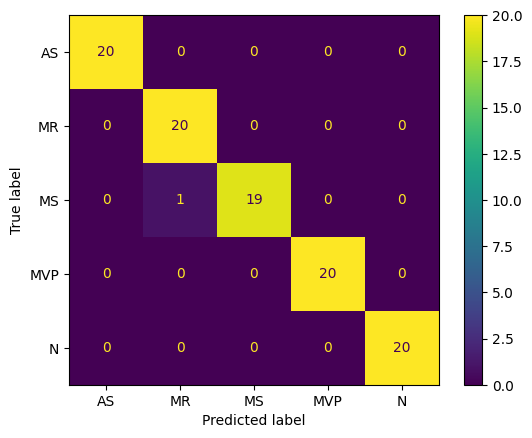

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [71]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [72]:
print("TNR :" , TNR)
print("TPR :" , TPR)
print("FPR :" , FPR)
print("FNR :" , FNR)
print("ACC :" , ACC)
print("PPV :" , PPV)
print("NPV :" , NPV)
print("FDR :" , FDR)


TNR : [1.     0.9875 1.     1.     1.    ]
TPR : [1.   1.   0.95 1.   1.  ]
FPR : [0.     0.0125 0.     0.     0.    ]
FNR : [0.   0.   0.05 0.   0.  ]
ACC : [1.   0.99 0.99 1.   1.  ]
PPV : [1.         0.95238095 1.         1.         1.        ]
NPV : [1.         1.         0.98765432 1.         1.        ]
FDR : [0.         0.04761905 0.         0.         0.        ]
